# Analisando Tweets: Dental Implants - Atualizado

In [1]:
# carregando bibliotecas
library("RPostgreSQL")
library("ggplot2")

# configurações PostgreSQL
db_server="kode.ffclrp.usp.br"
db_port="5432"
db_user=""
db_password=""
db_name="twitter"

# carregando configurações PostgreSQL do arquivo
source("conf.R")

# conectando com o banco de dados
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = db_name,
                 host = db_server, port = db_port,
                 user = db_user, password = db_password)

Loading required package: DBI



## Tweets por dia:

In [2]:
twsDia <- dbGetQuery(con, paste("SELECT " ,
                          "t.datatweet, " ,
                          "count(t.codtweet) AS tweet ",
                          "FROM tweet t " ,
                          "INNER JOIN amostratweet at ON at.codtweet = t.codtweet ",
                          "WHERE at.codamostra = 219 " ,
                          "GROUP BY 1" ,
                          "ORDER BY 1"))
saveRDS(twsDia, file = "data/twsDia2020.rds")

In [3]:
twsDia

,datatweet,tweet
,<date>,<dbl>
1,2016-07-12,99
2,2016-07-13,298
3,2016-07-14,328
4,2016-07-15,345
5,2016-07-16,311
6,2016-07-17,234
7,2016-07-18,407
8,2016-07-19,618
9,2016-07-20,291


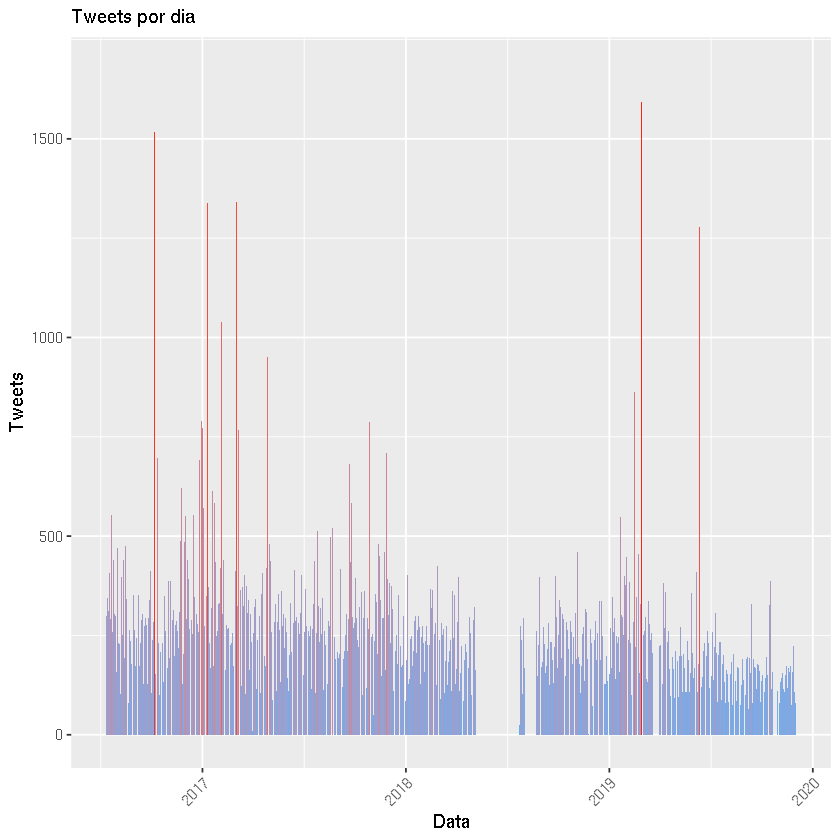

In [4]:
ggplot(data = twsDia, aes(x = datatweet, y = tweet, fill = tweet )) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_gradient(low = "#56B1F7", high = "red")+
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets por dia")

## Tweets por mês:

In [5]:
twsMes <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as datatweet, " ,
                          "count(t.codtweet) AS tweet " ,
                          "FROM tweet t " ,
                          "INNER JOIN amostratweet at ON at.codtweet = t.codtweet ",
                          "WHERE at.codamostra = 219 " ,
                          "GROUP BY 1" ,
                          "ORDER BY 1"))
saveRDS(twsMes, file = "data/twsMes2020.rds")

In [6]:
twsMes

,datatweet,tweet
,<chr>,<dbl>
1,2016-07,6466
2,2016-08,9534
3,2016-09,7855
4,2016-10,9159
5,2016-11,8417
6,2016-12,14716
7,2017-01,15087
8,2017-02,8633
9,2017-03,11443


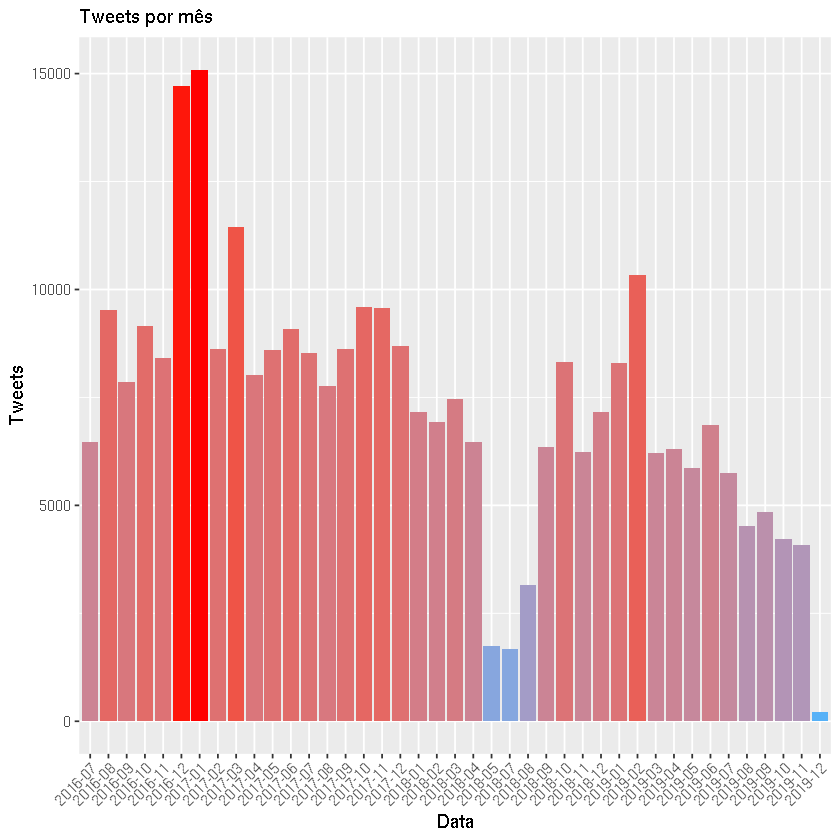

In [7]:
ggplot(data = twsMes, aes(x = datatweet, y = tweet, fill = tweet )) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_gradient(low = "#56B1F7", high = "red")+
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets por mês")

In [8]:
twsPais <- dbGetQuery(con, paste("SELECT " ,
                          "local1 as pais, " ,
                          "count(t.codtweet) AS tweet FROM tweet t " ,
                          "inner join amostratweet at on at.codtweet = t.codtweet ",
                          "where at.codamostra = 219 and local1 <> '' ",
                          "GROUP BY 1" ,
                          "ORDER BY 2 desc"))
saveRDS(twsPais, file = "data/twsPais")

In [9]:
twsPais

,pais,tweet
,<chr>,<dbl>
1,United States,1803
2,United Kingdom,419
3,India,361
4,Canada,115
5,Australia,105
6,Kingdom of Saudi Arabia,33
7,United Arab Emirates,26
8,Republic of the Philippines,23
9,Ireland,19


In [10]:
twsIdiomas <- dbGetQuery(con, paste("SELECT " ,
                          "json->>'lang' as idioma, count(t.codtweet) as quantidade" ,
                          "from tweet t",
                          "inner join amostratweet at on at.codtweet = t.codtweet ",
                          "where at.codamostra = 218 ",
                          "GROUP BY 1" ,
                          "ORDER BY 2 desc"))
saveRDS(twsIdiomas, file = "data/twsIdiomas")

In [11]:
twsIdiomas

,idioma,quantidade
,<chr>,<dbl>
1,en,299987
2,ja,10083
3,und,5538
4,fr,2053
5,ca,1701
6,de,1027
7,es,828
8,da,816
9,ro,618
